## Question 1:  identify variables in experiment
* independent variable: type of the test (congruent or incongruent)
* dependent variable: time spent on test (measured in seconds)

## Question 2a: Establish hypothesis

I am provided with two samples of data from congruent and incongruent parts of Stroop test. I want to establish if these two samples are from statistically different populations (sample means are different because the two populations and population means are different) or just by chance. 

* Null hypothesis $H_{0}$: There is no significant difference between congruent and incongruent parts of test. If $\mu_{c}$ is a hypothetical average of all congruent test results and $\mu_{i}$ - same for incongruent, $H_{0}$:  $\mu_{i} = \mu_{c}$
* Alternative hypothesis $H_{A}$: there is a statistically significant difference between congruent and incongruent tests. Moreover, I expect the incongruent test takes longer time to complete based on my own experience, thus $H_{A}$: $\mu_{i} > \mu_{c}$

## Question 2b: Statistical test

Since I do not know the variances of two population distributions, I will perform one-sided t-test using provided data on two samples. T-test is commonly used with small sample sizes (in my case the sample size is 24). I also assume that the distributions are normal.

* I will run t-test to see if there is a statistically significant difference between two types of test: single-tailed study, alpha level 0.05.

* I need to calulate t-statistic and compare it to t-critical value. If my t-statistic falls outside of t-critical at the right-hand side of probability distribution, then I reject the null hypothesis, otherwise I fail to reject the null.

* To calculate t-statistic I will need to find means and standard deviations of the congruent and incongruent samples.
then t-stat = $\frac{\mu_{i}-\mu_{c}}{\frac{S_{difference}}{\sqrt{n}}}$  
where $S_{difference}$ is a standard deviation of the sample difference calculated using Bessel's correction, and n=24.


In [6]:
# import all necessary packages and functions.
import csv
from datetime import datetime
import numpy as np
import pandas as pd
from IPython.display import display
import matplotlib.pyplot as plt

In [7]:
# loading Stroop data from .csv file
# columns:
data = np.genfromtxt('P1-Stroop_data1.csv', delimiter=',', dtype=None)
congr = data[:,0]
incongr = data[:,1]

In [8]:
print "congruent times ",congr
print
print "incongruent times ",incongr

congruent times  [ 12.079  16.791   9.564   8.63   14.669  12.238  14.692   8.987   9.401
  14.48   22.328  15.298  15.073  16.929  18.2    12.13   18.495  10.639
  11.344  12.369  12.944  14.233  19.71   16.004]

incongruent times  [ 19.278  18.741  21.214  15.687  22.803  20.878  24.572  17.394  20.762
  26.282  24.524  18.644  17.51   20.33   35.255  22.158  25.139  20.429
  17.425  34.288  23.894  17.96   22.058  21.157]


## Question 3: Report descriptive statistics

* congruent stats:  $\bar{x_{c}} = 14.051125$,   standard deviation using Bessel's correction $s_{c} = 3.55935795765$
* incongruent stats:  $\bar{x_{i}} = 22.0159166667$,   standard deviation using Bessel's correction $s_{i} = 4.79705712247$

In [11]:
#statistics

def stats(data_list):
    return np.mean(data_list),np.std(data_list, ddof=1)
congr_mean, congr_std = stats(congr)
incongr_mean, incongr_std = stats(incongr)

print "congruent stats: ", "mean =",congr_mean, "  standard deviation s =",congr_std
print "incongruent stats: ", "mean =",incongr_mean, "  standard deviation s =",incongr_std

 congruent stats:  mean = 14.051125   standard deviation s = 3.55935795765
incongruent stats:  mean = 22.0159166667   standard deviation s = 4.79705712247


## Question 4: Visualization

* Histograms with bins = 2.5 are plotted for "congruent" and "incongruent" sets of data. The data are "bell-shaped",for the purpose of this study I conclude the data are normally distributed. There is a visible difference between the means of two distributions.
* Also, for the incongruent data I see some grouping around 35 sec. For some reasons, there is a group of people, for whom the incongruent part of the test was especially challenging.  My results were similar: it took me 2.3 times longer to complete the second part of the test. Since the test is in English, is it possible that not native English speakers (like myself) find the incongruent part even more difficult? On top of the image recognition the brain should also run English translation... This could be an interesting study.

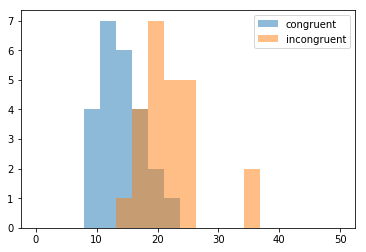

In [15]:
#bin size = 2.5
bins = np.linspace(0, 50, 20)

plt.hist(congr, bins, alpha=0.5, label='congruent')
plt.hist(incongr, bins, alpha=0.5, label='incongruent')
plt.legend(loc='upper right')
plt.show()


## Question 5: Statistical test

* for single-tailed study the t-critical value at p=.05 and the degree of freedome=23 is: t-critical=1.714
* point estimate for the difference of the means is: 7.96479166667, $S_{difference}$ = 4.86482691036 using Bessel's correction, SE = 0.993028634778 
* Based on my calulations t-statistic = 8.02070694411 which is well beyond t-critical value. From http://www.graphpad.com/quickcalcs/pValue2/  P-value is less than 0.0001. Confidence interval is (6.26274058666 , 9.66684274668)
* the result is statistically significant and I reject $H_{0}$.

**The result from the study based on two samples is what I was expecting: the incongruent part of Stroop test takes longer time to complete.** 


In [26]:
t_cr = 1.714

#mean difference
#mean_D = incongr_mean - congr_mean
D = incongr-congr
D_mean = np.mean(D)

#standard deviation of difference (w/Bessel's correction)
D_std = np.std(D,ddof=1)

#standard error
SE = D_std/np.power(len(congr),0.5)

print "mean Difference ",D_mean
print "standard deviation of Difference ",D_std
print "standard error SE ", SE

#t-statistics
t_statistic = D_mean/SE
print "t-statistic =", t_statistic

#Confidence interval for the mean difference
conf_int1 = D_mean-t_cr*SE
conf_int2 = D_mean+t_cr*SE

print "Confidence Interval = (",conf_int1,",", conf_int2,")"


mean Difference  7.96479166667
standard deviation of Difference  4.86482691036
standard error SE  0.993028634778
t-statistic = 8.02070694411
Confidence Interval = ( 6.26274058666 , 9.66684274668 )


## Question 6: Discussion

Stroop test elucidates the underlining cognitive processes, such as selective attention, automaticity, processing speed. Different parts of our brain are responsible for reading words or recognizing colors. Different variations of Stroop test are used by psychologists to study the ways the information is processed by the human brain. Here are couple examples: (A) recognizing the emotion by the picture (proxy for color) and reading the word that describes this emotion; (B) the name of the animal and its picture:
![alt text](emotionalstroop.jpg)
![alt text](animalsstroop.jpg)

## References:
* [1] https://en.wikipedia.org/wiki/Stroop_effect
* [2] https://thestroopeffect.wikispaces.com/Variations+of+the+Stroop+Test

